# Advanced Exploratory Data Analysis (EDA)

This notebook provides a comprehensive overview of the merchant and transaction data, including summary statistics, null value analysis, and visualizations to support downstream business analysis.

In [12]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

spark = SparkSession.builder.getOrCreate()
%matplotlib inline

## 1. Load Data

In [24]:
# Load Spark DataFrames
merchants_sdf = spark.read.csv('/home/jovyan/data/in/merchants-subset.csv', header=True, inferSchema=True)
transactions_sdf = spark.read.parquet('/home/jovyan/data/in/historical_transactions.parquet')

# Load data dictionary
data_dict_merchants = pd.read_excel('/home/jovyan/data/in/data_dictionary.xlsx', sheet_name='merchants.csv')
data_dict_transactions = pd.read_excel('/home/jovyan/data/in/data_dictionary.xlsx', sheet_name='historical transactions.csv')

display(data_dict_merchants.head(30))
display(data_dict_transactions.head(30))

,Merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_name,"Anonymized merchant names, this should appear ..."
3,merchant_id,Unique merchant identifier
4,merchant_group_id,Merchant group (anonymized )
5,merchant_category_id,Unique identifier for merchant category (anony...
6,subsector_id,Merchant category group (anonymized )
7,numerical_1,anonymized measure
8,numerical_2,anonymized measure
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,customer_id,customer identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category,anonymized category
7,installments,number of installments of purchase
8,merchant_category_id,Merchant category identifier (anonymized )
9,subsector_id,Merchant category group identifier (anonymized )


## 2. Data Overview and Schema

In [15]:
print('Merchants columns:', merchants_sdf.columns)
merchants_sdf.printSchema()
print('Transactions columns:', transactions_sdf.columns)
transactions_sdf.printSchema()

Merchants columns: ['merchant_name', 'merchant_id', 'merchant_group_id', 'merchant_category_id', 'subsector_id', 'numerical_1', 'numerical_2', 'most_recent_sales_range', 'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'city_id', 'state_id']
root
 |-- merchant_name: string (nullable = true)
 |-- merchant_id: string (nullable = true)
 |-- merchant_group_id: integer (nullable = true)
 |-- merchant_category_id: integer (nullable = true)
 |-- subsector_id: integer (nullable = true)
 |-- numerical_1: double (nullable = true)
 |-- numerical_2: double (nullable = true)
 |-- most_recent_sales_range: string (nullable = true)
 |-- most_recent_purchases_range: string (nullable = true)
 |-- avg_sales_lag3: double (nullable = true)
 |-- avg_purchases_lag3: string (nullable = true)
 |-- active_months_lag3: integer (nullable = true)

## 3. Null Value Analysis

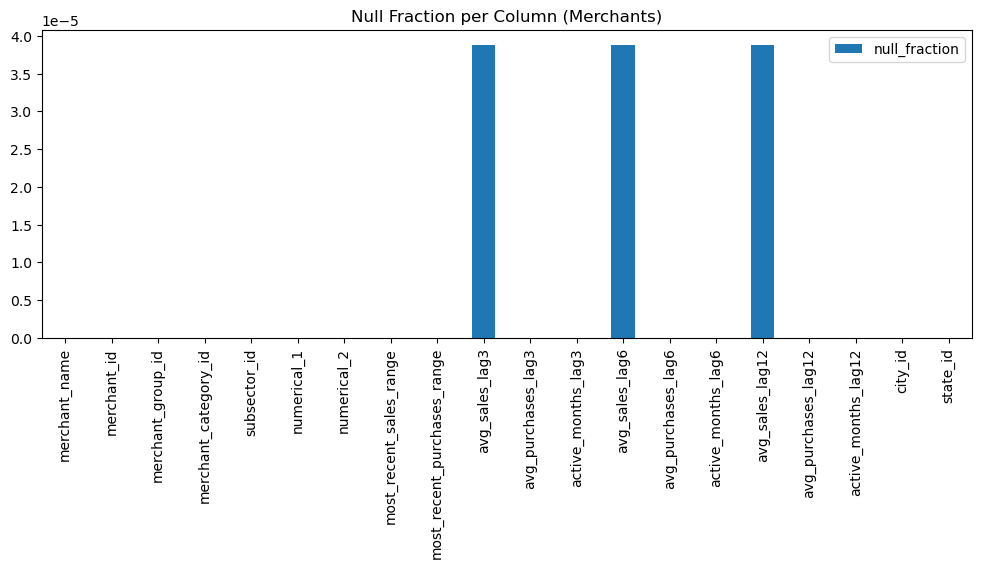

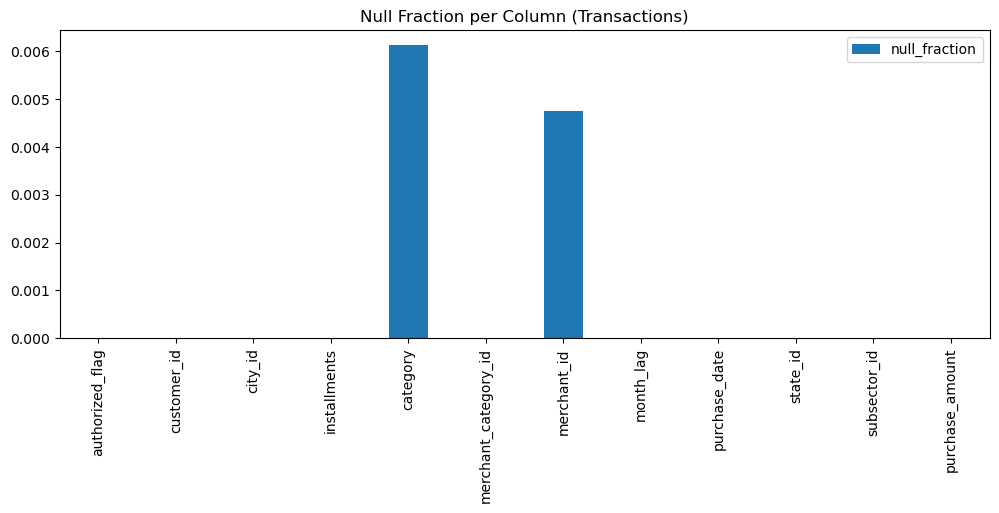

In [16]:
import pyspark.sql.functions as F

# Nulls in merchants
nulls_merchants = merchants_sdf.select([
    (1 - (F.count(F.col(c)) / F.count('*'))).alias(c) for c in merchants_sdf.columns
]).toPandas().T
nulls_merchants.columns = ['null_fraction']
nulls_merchants.plot(kind='bar', figsize=(12,4), title='Null Fraction per Column (Merchants)')
plt.show()

# Nulls in transactions
nulls_transactions = transactions_sdf.select([
    (1 - (F.count(F.col(c)) / F.count('*'))).alias(c) for c in transactions_sdf.columns
]).toPandas().T
nulls_transactions.columns = ['null_fraction']
nulls_transactions.plot(kind='bar', figsize=(12,4), title='Null Fraction per Column (Transactions)')
plt.show()

## 4. Summary Statistics (Pandas Sample)

In [17]:
# Sample for pandas analysis
merchants_pd = merchants_sdf.limit(10000).toPandas()
transactions_pd = transactions_sdf.limit(100000).toPandas()

display(merchants_pd.describe(include='all').T)
display(transactions_pd.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
merchant_name,10000,10000,Arlene Rivet inc,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,10000,9987,M_ID_bd49e37dda,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_group_id,10000.0,NaN,NaN,NaN,21523.7915,22371.398078,8.0,3850.0,14075.0,32435.75,112122.0
merchant_category_id,10000.0,NaN,NaN,NaN,420.8241,257.446369,-1.0,206.0,414.0,683.0,891.0
subsector_id,10000.0,NaN,NaN,NaN,26.2415,9.826334,-1.0,20.0,27.0,34.0,41.0
numerical_1,10000.0,NaN,NaN,NaN,-0.056833,0.020109,-0.057471,-0.057471,-0.057471,-0.057471,1.885851
numerical_2,10000.0,NaN,NaN,NaN,-0.056878,0.020098,-0.057471,-0.057471,-0.057471,-0.057471,1.885851
most_recent_sales_range,10000,3,E,9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_recent_purchases_range,10000,3,E,9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_sales_lag3,9987.0,NaN,NaN,NaN,425.880559,13861.714835,-82.13,1.865,4.08,11.75,851844.64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
authorized_flag,100000,2,Y,91412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000,74397,C_ID_0cd2ce025c,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_id,100000.0,NaN,NaN,NaN,129.07288,103.833583,1.0,53.0,88.0,212.0,347.0
installments,100000.0,NaN,NaN,NaN,0.65212,1.159402,0.0,0.0,0.0,1.0,12.0
category,99421,3,A,52987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_category_id,100000.0,NaN,NaN,NaN,483.94053,248.797027,-1.0,307.0,489.0,705.0,891.0
merchant_id,99544,41482,M_ID_00a6ca8a8a,3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_lag,100000.0,NaN,NaN,NaN,-4.48901,3.593072,-13.0,-7.0,-4.0,-2.0,0.0
purchase_date,100000,97073,2017-11-30 00:00:00,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_id,100000.0,NaN,NaN,NaN,10.58963,6.368938,-1.0,9.0,9.0,16.0,24.0


## 5. Distributions and Visualizations

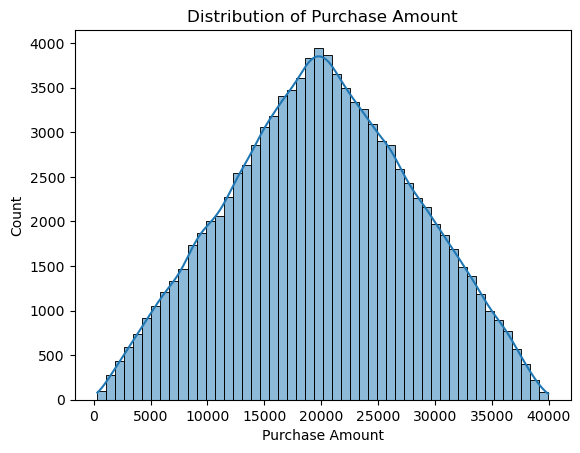

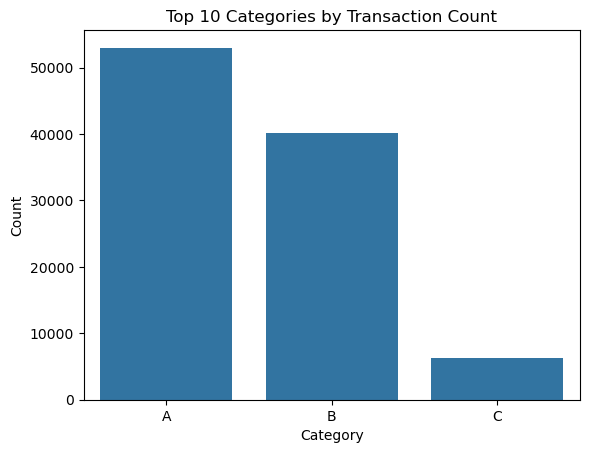

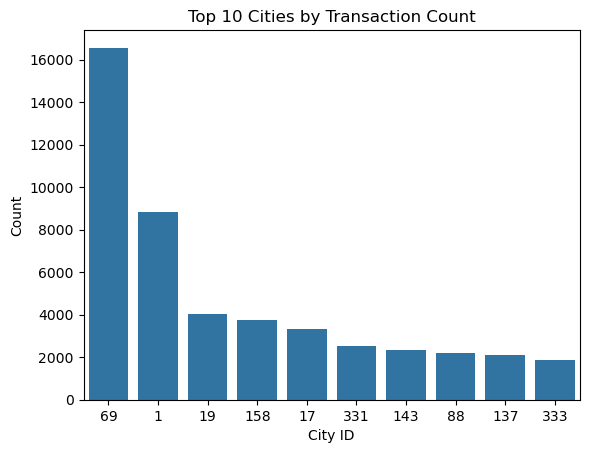

In [18]:
# Distribution of purchase_amount
sns.histplot(transactions_pd['purchase_amount'].dropna(), bins=50, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

# Top categories by transaction count
top_cats = transactions_pd['category'].value_counts().head(10)
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.title('Top 10 Categories by Transaction Count')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

# Top cities by transaction count
top_cities = transactions_pd['city_id'].value_counts().head(10)
sns.barplot(x=top_cities.index.astype(str), y=top_cities.values)
plt.title('Top 10 Cities by Transaction Count')
plt.ylabel('Count')
plt.xlabel('City ID')
plt.show()

## 6. Correlation Heatmap (Numerical Columns)

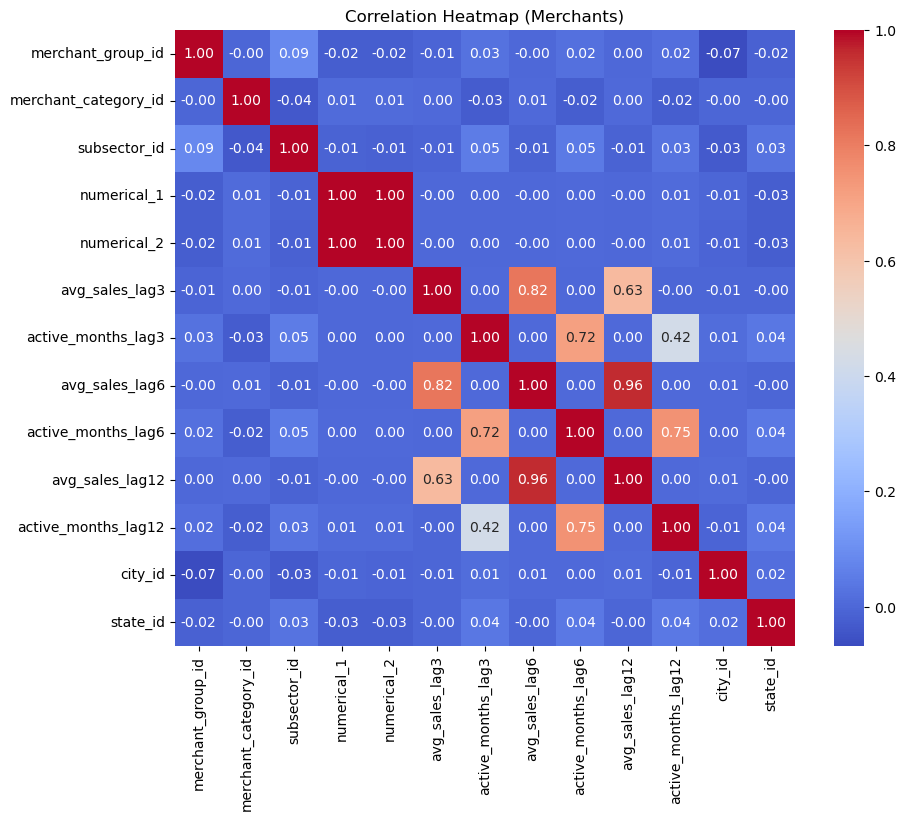

In [19]:
# Correlation heatmap for merchants
num_cols = merchants_pd.select_dtypes(include=[np.number]).columns
corr = merchants_pd[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Merchants)')
plt.show()

## 7. Time Series: Transactions Over Time

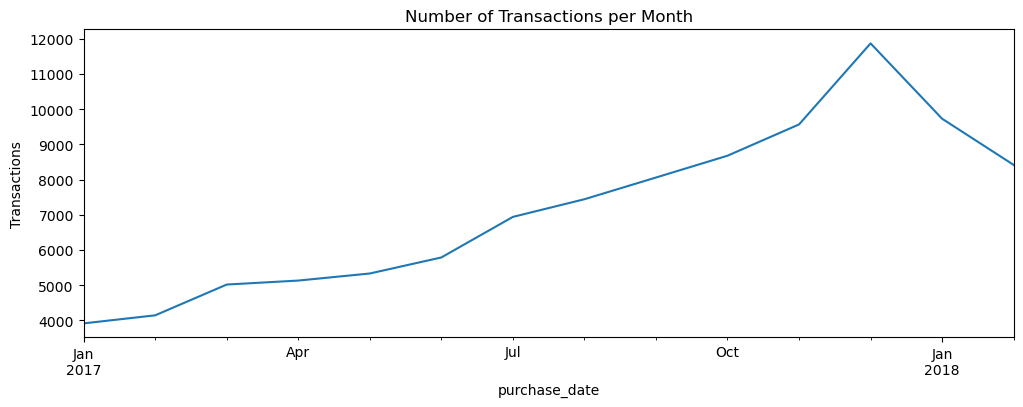

In [20]:
# Convert purchase_date to datetime
transactions_pd['purchase_date'] = pd.to_datetime(transactions_pd['purchase_date'], errors='coerce')
# Plot transactions per month
monthly = transactions_pd.set_index('purchase_date').resample('M').size()
monthly.plot(figsize=(12,4), title='Number of Transactions per Month')
plt.ylabel('Transactions')
plt.show()